In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Research/Colorization/Coloring-greyscale-images/Full-version"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Research/Colorization/Coloring-greyscale-images/Full-version'
/content


import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.engine import Layer
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model
from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img,smart_resize
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [ ]:
import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
# from keras.engine import Layers
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization

# from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model
from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img,smart_resize
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [ ]:
def model_creation():
  embed_input = Input(shape=(1000,))

  #Encoder
  encoder_input = Input(shape=(256, 256, 1,))
  encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
  encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
  encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
  encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
  encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
  encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
  encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
  encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)

  #Fusion
  fusion_output = RepeatVector(32 * 32)(embed_input) 
  fusion_output = Reshape(([32, 32, 1000]))(fusion_output)
  fusion_output = concatenate([encoder_output, fusion_output], axis=3) 
  fusion_output = Conv2D(256, (1, 1), activation='relu', padding='same')(fusion_output) 



  #Decoder
  decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(fusion_output)
  decoder_output = UpSampling2D((2, 2))(decoder_output)
  decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
  decoder_output = UpSampling2D((2, 2))(decoder_output)
  decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
  decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
  decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
  decoder_output = UpSampling2D((2, 2))(decoder_output)

  model = Model(inputs=[encoder_input, embed_input], outputs=decoder_output)

  return model

In [ ]:
model = model_creation()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 128, 128, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 12  73856       ['conv2d_14[0][0]']              
                                8)                                                          

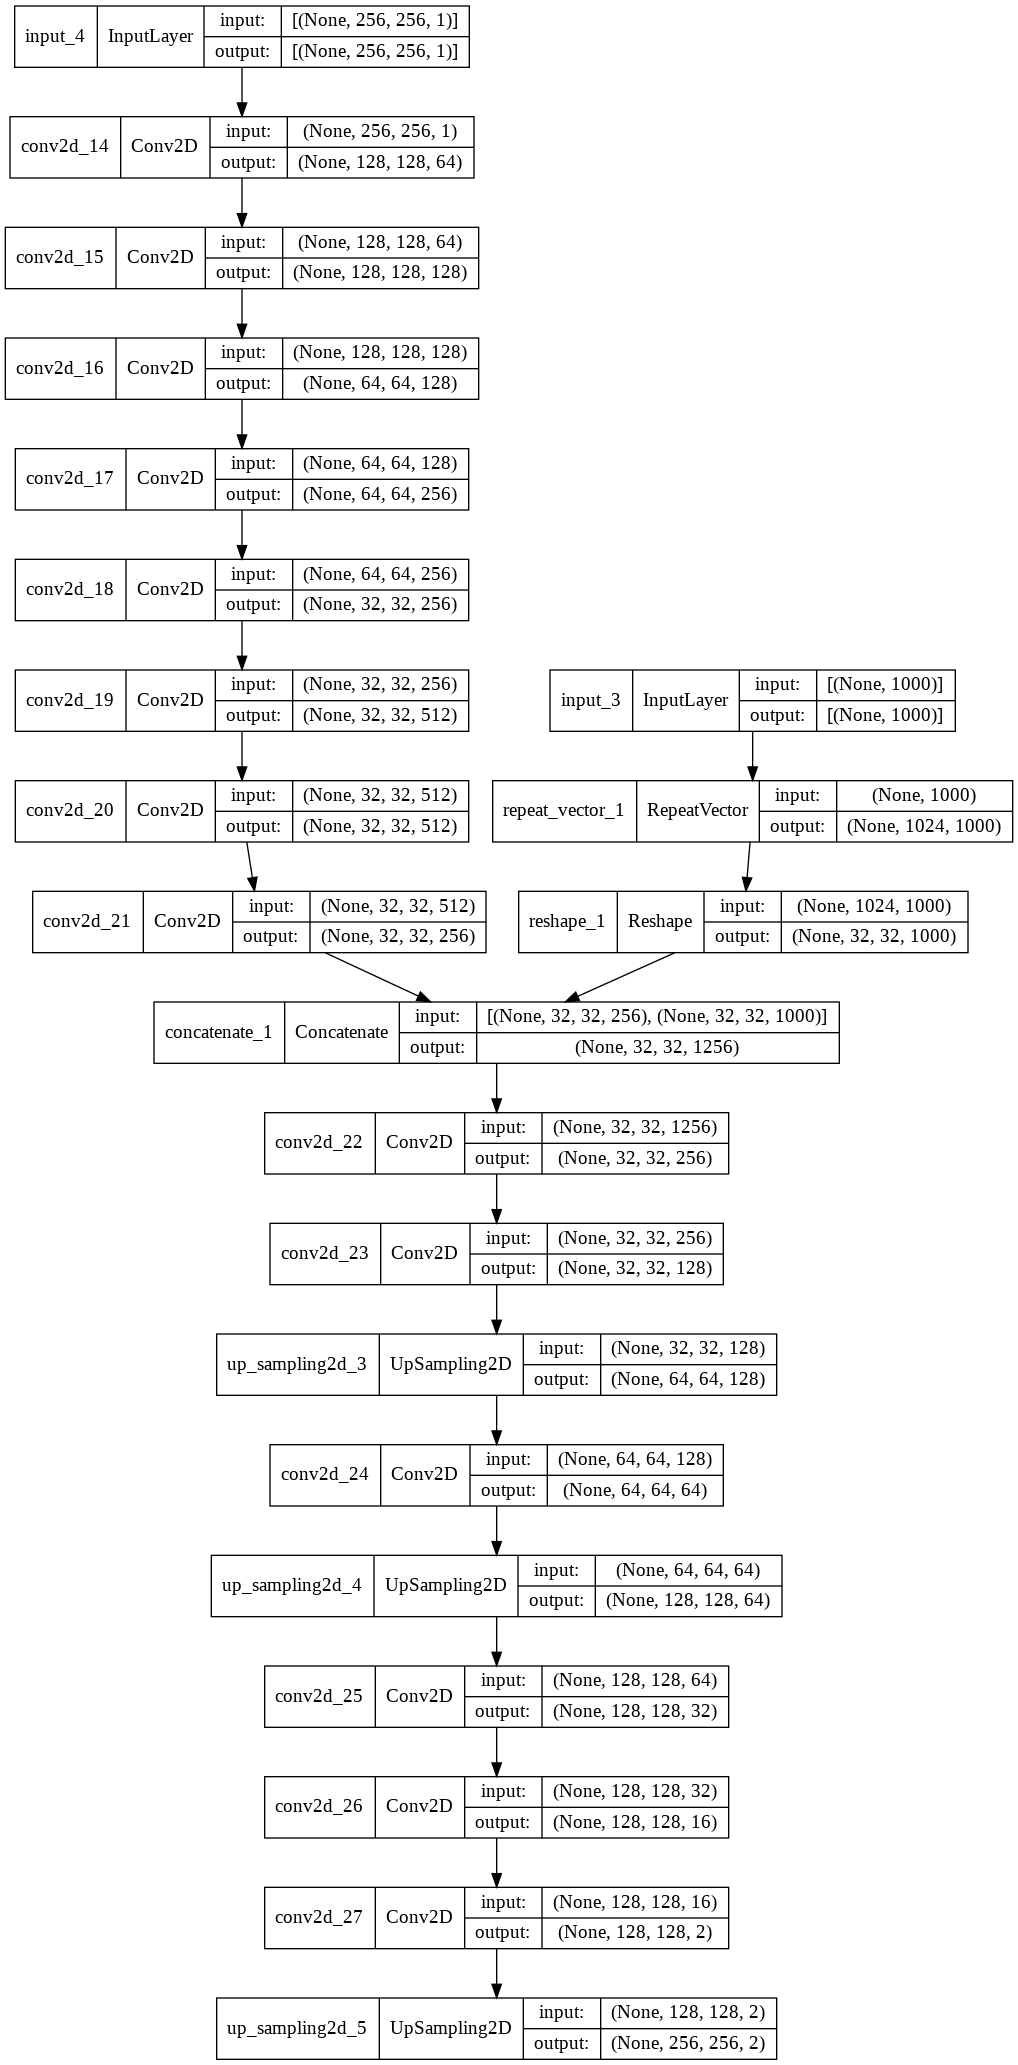

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [2]:
!pip install tensorflow_model_optimization

     |████████████████████████████████| 213 kB 5.4 MB/s 


In [3]:
from tensorflow_model_optimization.quantization.keras import quantize_annotate_layer
import tensorflow_model_optimization as tfmot
from tensorflow.keras.optimizers import RMSprop
# importing libraries 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
from keras.callbacks import TensorBoard

print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.7.0
keras version 2.7.0
gpu is  not available


In [4]:
####### 30kb@91%


model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                        

In [5]:

model.compile(loss ='categorical_crossentropy',
                     optimizer ='adam', 
                   metrics =['accuracy'])

In [6]:
# q_aware stands for for quantization aware.
quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

q_aware_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 64, 64, 3)        3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 62, 62, 32)       963       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 31, 31, 32)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 29, 29, 64)       18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 14, 14, 64)       1

In [7]:
q_aware_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

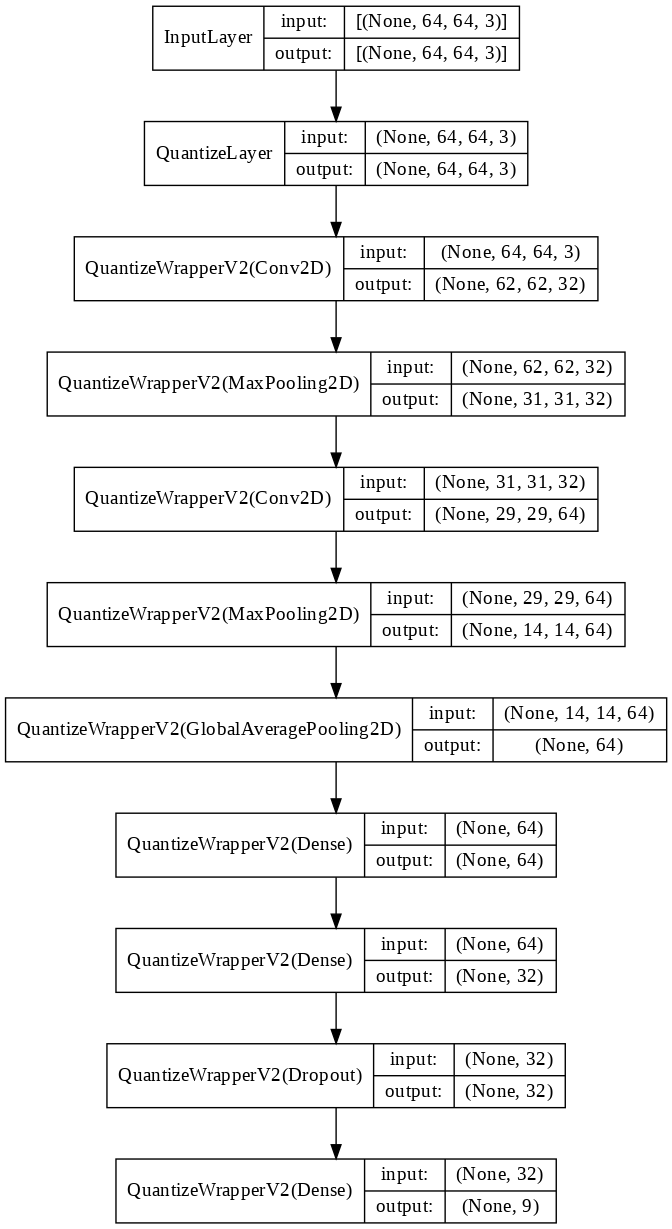

In [10]:
tf.keras.utils.plot_model(
    q_aware_model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    layer_range=None,
    show_layer_activations=True,
)